In [51]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
df = pd.read_excel('вся дата 14.12.xlsx')

# Our data after collection

In [52]:
df

,Name,Salary,Company,Adress,Experience,Description,Skills
0,Специалист разметки со знанием казахского языка,до 147 000 ₸,Яндекс Крауд,Караганда,Без опыта,Представляем Вашему вниманию крупнейший в Балх...,"Обучение персонала, Розничная торговля, Торгов..."
1,Специалист разметки со знанием казахского языка,до 147 000 ₸,Яндекс Крауд,Уральск,Без опыта,Основная задача бэк-энд разработчика – внедрен...,"Java, Angular, Oracle Pl/SQL, PostgreSQL, SQL,..."
2,Специалист разметки со знанием казахского языка,до 147 000 ₸,Яндекс Крауд,Актобе,Без опыта,В ресторан компании /nI'm feel-good restauran...,"Кадровое делопроизводство, 1С: Зарплата и упра..."
3,Специалист по тендерам,от 200 000 ₸,ТОО INVITRO (ТОО ИНВИТРО-Казахстан),"Алматы, Райымбек батыра",Опыт от 1 года до 3 лет,Обязанности: /n /n /n /n /n /nРабота с бо...,NaN
4,Специалист по учету договоров,NaN,АО NOMAD insurance,Талдыкорган,Без опыта,С чем придется работать? /n /nПроведение полн...,NaN
...,...,...,...,...,...,...,...
15496,"Intern, International Tax group, Tax Departmen...",NaN,ТОО KPMG,Алматы,Без опыта,"Обязанности: разработка чертежей, выполнени...","Работа с чертежами, Word, офисные программы, у..."
15497,Associate to Tax Reporting & Strategy team (Ta...,NaN,PricewaterhouseCoopers,Алматы,Опыт от 1 года до 3 лет,Обязанности: Develop and execute compr...,"Английский язык, Разработка маркетинговой стра..."
15498,Portfolio Manager,NaN,ТОО АНТАЛ БИЗНЕС РЕШЕНИЯ (ТМ Antal Kazakhstan),Алматы,Опыт от 3 до 6 лет,Duties: Work as proxy Product Owner Work...,Английский — C1 — Продвинутый
15499,Shopify Expert,NaN,"Velvetech, LLC",Алматы,Опыт от 3 до 6 лет,Юридическая консалтинговая компания WE Legal ...,"Английский язык, Составление договоров, Быстро..."


# Numeric representation of salary

In [53]:
def process_salary(salary_string):
    if isinstance(salary_string, str): 
        numbers = [int(s) for s in salary_string.split() if s.isdigit()]
        
        if 'от' in salary_string:
            return numbers[0]
        elif '-' in salary_string:
            return sum(numbers) // 2  
        elif '$' in salary_string:
            return int(numbers[0]) * 453
        else:
            return numbers[0] 
    else:
        return salary_string 

df['Salary'] = df['Salary'].apply(process_salary)
df

,Name,Salary,Company,Adress,Experience,Description,Skills
0,Специалист разметки со знанием казахского языка,147.0,Яндекс Крауд,Караганда,Без опыта,Представляем Вашему вниманию крупнейший в Балх...,"Обучение персонала, Розничная торговля, Торгов..."
1,Специалист разметки со знанием казахского языка,147.0,Яндекс Крауд,Уральск,Без опыта,Основная задача бэк-энд разработчика – внедрен...,"Java, Angular, Oracle Pl/SQL, PostgreSQL, SQL,..."
2,Специалист разметки со знанием казахского языка,147.0,Яндекс Крауд,Актобе,Без опыта,В ресторан компании /nI'm feel-good restauran...,"Кадровое делопроизводство, 1С: Зарплата и упра..."
3,Специалист по тендерам,200.0,ТОО INVITRO (ТОО ИНВИТРО-Казахстан),"Алматы, Райымбек батыра",Опыт от 1 года до 3 лет,Обязанности: /n /n /n /n /n /nРабота с бо...,NaN
4,Специалист по учету договоров,NaN,АО NOMAD insurance,Талдыкорган,Без опыта,С чем придется работать? /n /nПроведение полн...,NaN
...,...,...,...,...,...,...,...
15496,"Intern, International Tax group, Tax Departmen...",NaN,ТОО KPMG,Алматы,Без опыта,"Обязанности: разработка чертежей, выполнени...","Работа с чертежами, Word, офисные программы, у..."
15497,Associate to Tax Reporting & Strategy team (Ta...,NaN,PricewaterhouseCoopers,Алматы,Опыт от 1 года до 3 лет,Обязанности: Develop and execute compr...,"Английский язык, Разработка маркетинговой стра..."
15498,Portfolio Manager,NaN,ТОО АНТАЛ БИЗНЕС РЕШЕНИЯ (ТМ Antal Kazakhstan),Алматы,Опыт от 3 до 6 лет,Duties: Work as proxy Product Owner Work...,Английский — C1 — Продвинутый
15499,Shopify Expert,NaN,"Velvetech, LLC",Алматы,Опыт от 3 до 6 лет,Юридическая консалтинговая компания WE Legal ...,"Английский язык, Составление договоров, Быстро..."


In [54]:
def process_salary(salary_value):
    if isinstance(salary_value, float) and not np.isnan(salary_value):
        return '{:.0f}'.format(salary_value * 1000) 
        
    return salary_value  

df['Salary'] = df['Salary'].apply(process_salary)

df

,Name,Salary,Company,Adress,Experience,Description,Skills
0,Специалист разметки со знанием казахского языка,147000,Яндекс Крауд,Караганда,Без опыта,Представляем Вашему вниманию крупнейший в Балх...,"Обучение персонала, Розничная торговля, Торгов..."
1,Специалист разметки со знанием казахского языка,147000,Яндекс Крауд,Уральск,Без опыта,Основная задача бэк-энд разработчика – внедрен...,"Java, Angular, Oracle Pl/SQL, PostgreSQL, SQL,..."
2,Специалист разметки со знанием казахского языка,147000,Яндекс Крауд,Актобе,Без опыта,В ресторан компании /nI'm feel-good restauran...,"Кадровое делопроизводство, 1С: Зарплата и упра..."
3,Специалист по тендерам,200000,ТОО INVITRO (ТОО ИНВИТРО-Казахстан),"Алматы, Райымбек батыра",Опыт от 1 года до 3 лет,Обязанности: /n /n /n /n /n /nРабота с бо...,NaN
4,Специалист по учету договоров,NaN,АО NOMAD insurance,Талдыкорган,Без опыта,С чем придется работать? /n /nПроведение полн...,NaN
...,...,...,...,...,...,...,...
15496,"Intern, International Tax group, Tax Departmen...",NaN,ТОО KPMG,Алматы,Без опыта,"Обязанности: разработка чертежей, выполнени...","Работа с чертежами, Word, офисные программы, у..."
15497,Associate to Tax Reporting & Strategy team (Ta...,NaN,PricewaterhouseCoopers,Алматы,Опыт от 1 года до 3 лет,Обязанности: Develop and execute compr...,"Английский язык, Разработка маркетинговой стра..."
15498,Portfolio Manager,NaN,ТОО АНТАЛ БИЗНЕС РЕШЕНИЯ (ТМ Antal Kazakhstan),Алматы,Опыт от 3 до 6 лет,Duties: Work as proxy Product Owner Work...,Английский — C1 — Продвинутый
15499,Shopify Expert,NaN,"Velvetech, LLC",Алматы,Опыт от 3 до 6 лет,Юридическая консалтинговая компания WE Legal ...,"Английский язык, Составление договоров, Быстро..."


# Numeric representation of experiences

In [55]:

def process_experience(experience_string):
    if isinstance(experience_string, str): 
        numbers = [int(s) for s in experience_string.split() if s.isdigit()]
        

        if 'от' in experience_string and 'до' in experience_string:
            return numbers[0], numbers[1] 
        elif 'от' in experience_string:
            return numbers[0], numbers[0]  
        elif 'до' in experience_string:
            return 0, numbers[0]  
        elif 'без опыта' in experience_string.lower():
            return 0, 0 
    else:
        return None, None 
df[['Min_Experience', 'Max_Experience']] = df['Experience'].apply(process_experience).apply(pd.Series)

df[['Min_Experience', 'Max_Experience']] = df[['Min_Experience', 'Max_Experience']].replace([np.inf, -np.inf], np.nan).fillna(0)


df[['Min_Experience', 'Max_Experience']] = df[['Min_Experience', 'Max_Experience']].astype(int)



In [56]:
df

,Name,Salary,Company,Adress,Experience,Description,Skills,Min_Experience,Max_Experience
0,Специалист разметки со знанием казахского языка,147000,Яндекс Крауд,Караганда,Без опыта,Представляем Вашему вниманию крупнейший в Балх...,"Обучение персонала, Розничная торговля, Торгов...",0,0
1,Специалист разметки со знанием казахского языка,147000,Яндекс Крауд,Уральск,Без опыта,Основная задача бэк-энд разработчика – внедрен...,"Java, Angular, Oracle Pl/SQL, PostgreSQL, SQL,...",0,0
2,Специалист разметки со знанием казахского языка,147000,Яндекс Крауд,Актобе,Без опыта,В ресторан компании /nI'm feel-good restauran...,"Кадровое делопроизводство, 1С: Зарплата и упра...",0,0
3,Специалист по тендерам,200000,ТОО INVITRO (ТОО ИНВИТРО-Казахстан),"Алматы, Райымбек батыра",Опыт от 1 года до 3 лет,Обязанности: /n /n /n /n /n /nРабота с бо...,NaN,1,3
4,Специалист по учету договоров,NaN,АО NOMAD insurance,Талдыкорган,Без опыта,С чем придется работать? /n /nПроведение полн...,NaN,0,0
...,...,...,...,...,...,...,...,...,...
15496,"Intern, International Tax group, Tax Departmen...",NaN,ТОО KPMG,Алматы,Без опыта,"Обязанности: разработка чертежей, выполнени...","Работа с чертежами, Word, офисные программы, у...",0,0
15497,Associate to Tax Reporting & Strategy team (Ta...,NaN,PricewaterhouseCoopers,Алматы,Опыт от 1 года до 3 лет,Обязанности: Develop and execute compr...,"Английский язык, Разработка маркетинговой стра...",1,3
15498,Portfolio Manager,NaN,ТОО АНТАЛ БИЗНЕС РЕШЕНИЯ (ТМ Antal Kazakhstan),Алматы,Опыт от 3 до 6 лет,Duties: Work as proxy Product Owner Work...,Английский — C1 — Продвинутый,3,6
15499,Shopify Expert,NaN,"Velvetech, LLC",Алматы,Опыт от 3 до 6 лет,Юридическая консалтинговая компания WE Legal ...,"Английский язык, Составление договоров, Быстро...",3,6


# Extracting city names and adding column 'Jobs Count ' 

In [57]:
unique_values = df['Adress'].unique()
print("Уникальные значения:", unique_values)

df['City'] = df['Adress'].apply(lambda x: x.split(',')[0])
df.drop(columns=['Adress'], inplace=True)
df
print()
df['City'] = df['City'].str.split().str.get(0)

unique_values = df['City'].unique()
print("Уникальные значения:", unique_values)

unique_counts = df['City'].value_counts()
print("Количество уникальных элементов:")
print(unique_counts)

df['Jobs Count'] = df['City'].map(df['City'].value_counts())

Уникальные значения: ['Караганда' 'Уральск' 'Актобе' 'Алматы, Райымбек батыра' 'Талдыкорган'
 'Алматы' 'Туркестан' 'Алматы, Абая и еще\xa01\xa0' 'Шымкент' 'Астана'
 'Кокшетау' 'Актау' 'Алматы, Театр имени Ауэзова' 'Алматы, Байконур'
 'Алматы, Алатау' 'Аксай (Казахстан)' 'Тараз' 'Алматы, Абая'
 'Петропавловск' 'Костанай' 'Атырау' 'Жезказган' 'Кызылорда'
 'Алматы, Алатау и еще\xa02\xa0' 'Усть-Каменогорск' 'Алматы, Сайран'
 'Алматы, Алмалы' 'Жанаозен' 'Алматы, Байконур и еще\xa01\xa0' 'Семей'
 'Павлодар' 'Конаев' 'Рудный' 'Темиртау' 'Экибастуз'
 'Алматы, Алмалы и еще\xa01\xa0' 'Алматы, Жибек Жолы' 'Балхаш'
 'Алматы, Бауыржан Момышулы' 'Макинск' 'Шемонаиха (ВКО)' 'Торткудук'
 'Актогай' 'Алматы, Абая и еще\xa02\xa0' 'Щучинск' 'Житикара' 'Хромтау'
 'Сарань' 'Степногорск' 'Лисаковск' 'Кульсары' 'Алматы, Москва'
 'Риддер (ВКО)' 'Алматы, Жибек Жолы и еще\xa01\xa0'
 'Алматы, Москва и еще\xa01\xa0' 'Аксу (Павлодар.обл)' 'Атакент'
 'Отеген-Батыр' 'Алматы, Алатау и еще\xa01\xa0'
 'Алматы, Абая и ещ

In [58]:
df

,Name,Salary,Company,Experience,Description,Skills,Min_Experience,Max_Experience,City,Jobs Count
0,Специалист разметки со знанием казахского языка,147000,Яндекс Крауд,Без опыта,Представляем Вашему вниманию крупнейший в Балх...,"Обучение персонала, Розничная торговля, Торгов...",0,0,Караганда,528
1,Специалист разметки со знанием казахского языка,147000,Яндекс Крауд,Без опыта,Основная задача бэк-энд разработчика – внедрен...,"Java, Angular, Oracle Pl/SQL, PostgreSQL, SQL,...",0,0,Уральск,149
2,Специалист разметки со знанием казахского языка,147000,Яндекс Крауд,Без опыта,В ресторан компании /nI'm feel-good restauran...,"Кадровое делопроизводство, 1С: Зарплата и упра...",0,0,Актобе,188
3,Специалист по тендерам,200000,ТОО INVITRO (ТОО ИНВИТРО-Казахстан),Опыт от 1 года до 3 лет,Обязанности: /n /n /n /n /n /nРабота с бо...,NaN,1,3,Алматы,8689
4,Специалист по учету договоров,NaN,АО NOMAD insurance,Без опыта,С чем придется работать? /n /nПроведение полн...,NaN,0,0,Талдыкорган,77
...,...,...,...,...,...,...,...,...,...,...
15496,"Intern, International Tax group, Tax Departmen...",NaN,ТОО KPMG,Без опыта,"Обязанности: разработка чертежей, выполнени...","Работа с чертежами, Word, офисные программы, у...",0,0,Алматы,8689
15497,Associate to Tax Reporting & Strategy team (Ta...,NaN,PricewaterhouseCoopers,Опыт от 1 года до 3 лет,Обязанности: Develop and execute compr...,"Английский язык, Разработка маркетинговой стра...",1,3,Алматы,8689
15498,Portfolio Manager,NaN,ТОО АНТАЛ БИЗНЕС РЕШЕНИЯ (ТМ Antal Kazakhstan),Опыт от 3 до 6 лет,Duties: Work as proxy Product Owner Work...,Английский — C1 — Продвинутый,3,6,Алматы,8689
15499,Shopify Expert,NaN,"Velvetech, LLC",Опыт от 3 до 6 лет,Юридическая консалтинговая компания WE Legal ...,"Английский язык, Составление договоров, Быстро...",3,6,Алматы,8689


# Finding count of skills

In [59]:
df['Skills_Count'] = df['Skills'].str.split(',').apply(lambda x: len(x) if isinstance(x, list) else 0)
df

,Name,Salary,Company,Experience,Description,Skills,Min_Experience,Max_Experience,City,Jobs Count,Skills_Count
0,Специалист разметки со знанием казахского языка,147000,Яндекс Крауд,Без опыта,Представляем Вашему вниманию крупнейший в Балх...,"Обучение персонала, Розничная торговля, Торгов...",0,0,Караганда,528,30
1,Специалист разметки со знанием казахского языка,147000,Яндекс Крауд,Без опыта,Основная задача бэк-энд разработчика – внедрен...,"Java, Angular, Oracle Pl/SQL, PostgreSQL, SQL,...",0,0,Уральск,149,6
2,Специалист разметки со знанием казахского языка,147000,Яндекс Крауд,Без опыта,В ресторан компании /nI'm feel-good restauran...,"Кадровое делопроизводство, 1С: Зарплата и упра...",0,0,Актобе,188,12
3,Специалист по тендерам,200000,ТОО INVITRO (ТОО ИНВИТРО-Казахстан),Опыт от 1 года до 3 лет,Обязанности: /n /n /n /n /n /nРабота с бо...,NaN,1,3,Алматы,8689,0
4,Специалист по учету договоров,NaN,АО NOMAD insurance,Без опыта,С чем придется работать? /n /nПроведение полн...,NaN,0,0,Талдыкорган,77,0
...,...,...,...,...,...,...,...,...,...,...,...
15496,"Intern, International Tax group, Tax Departmen...",NaN,ТОО KPMG,Без опыта,"Обязанности: разработка чертежей, выполнени...","Работа с чертежами, Word, офисные программы, у...",0,0,Алматы,8689,5
15497,Associate to Tax Reporting & Strategy team (Ta...,NaN,PricewaterhouseCoopers,Опыт от 1 года до 3 лет,Обязанности: Develop and execute compr...,"Английский язык, Разработка маркетинговой стра...",1,3,Алматы,8689,32
15498,Portfolio Manager,NaN,ТОО АНТАЛ БИЗНЕС РЕШЕНИЯ (ТМ Antal Kazakhstan),Опыт от 3 до 6 лет,Duties: Work as proxy Product Owner Work...,Английский — C1 — Продвинутый,3,6,Алматы,8689,1
15499,Shopify Expert,NaN,"Velvetech, LLC",Опыт от 3 до 6 лет,Юридическая консалтинговая компания WE Legal ...,"Английский язык, Составление договоров, Быстро...",3,6,Алматы,8689,11


# Normalization of numerical columns

In [60]:
numerical_cols = ['Salary', 'Min_Experience', 'Jobs Count','Skills_Count']

for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['Salary'].fillna(220000, inplace=True)


for col in numerical_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    df[col] = (df[col] - min_val) / (max_val - min_val)

In [61]:
df

,Name,Salary,Company,Experience,Description,Skills,Min_Experience,Max_Experience,City,Jobs Count,Skills_Count
0,Специалист разметки со знанием казахского языка,0.000358,Яндекс Крауд,Без опыта,Представляем Вашему вниманию крупнейший в Балх...,"Обучение персонала, Розничная торговля, Торгов...",0.000000,0,Караганда,0.060658,0.769231
1,Специалист разметки со знанием казахского языка,0.000358,Яндекс Крауд,Без опыта,Основная задача бэк-энд разработчика – внедрен...,"Java, Angular, Oracle Pl/SQL, PostgreSQL, SQL,...",0.000000,0,Уральск,0.017035,0.153846
2,Специалист разметки со знанием казахского языка,0.000358,Яндекс Крауд,Без опыта,В ресторан компании /nI'm feel-good restauran...,"Кадровое делопроизводство, 1С: Зарплата и упра...",0.000000,0,Актобе,0.021524,0.307692
3,Специалист по тендерам,0.000488,ТОО INVITRO (ТОО ИНВИТРО-Казахстан),Опыт от 1 года до 3 лет,Обязанности: /n /n /n /n /n /nРабота с бо...,NaN,0.333333,3,Алматы,1.000000,0.000000
4,Специалист по учету договоров,0.000537,АО NOMAD insurance,Без опыта,С чем придется работать? /n /nПроведение полн...,NaN,0.000000,0,Талдыкорган,0.008748,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
15496,"Intern, International Tax group, Tax Departmen...",0.000537,ТОО KPMG,Без опыта,"Обязанности: разработка чертежей, выполнени...","Работа с чертежами, Word, офисные программы, у...",0.000000,0,Алматы,1.000000,0.128205
15497,Associate to Tax Reporting & Strategy team (Ta...,0.000537,PricewaterhouseCoopers,Опыт от 1 года до 3 лет,Обязанности: Develop and execute compr...,"Английский язык, Разработка маркетинговой стра...",0.333333,3,Алматы,1.000000,0.820513
15498,Portfolio Manager,0.000537,ТОО АНТАЛ БИЗНЕС РЕШЕНИЯ (ТМ Antal Kazakhstan),Опыт от 3 до 6 лет,Duties: Work as proxy Product Owner Work...,Английский — C1 — Продвинутый,1.000000,6,Алматы,1.000000,0.025641
15499,Shopify Expert,0.000537,"Velvetech, LLC",Опыт от 3 до 6 лет,Юридическая консалтинговая компания WE Legal ...,"Английский язык, Составление договоров, Быстро...",1.000000,6,Алматы,1.000000,0.282051


# Adding columns Job_class

In [73]:

df['Points_of_Job'] = 0.5 * df['Salary'] + 0.3 * df['Min_Experience'] + 0.1 * df['Jobs Count'] + 0.1 * df['Skills_Count']


max_points = df['Points_of_Job'].max()


df['Job_Class'] = df['Points_of_Job'].apply(lambda x: 1 if x > max_points * 2 / 3 else (2 if x > max_points / 3 else 3))

df


,Name,Salary,Company,Experience,Description,Skills,Min_Experience,Max_Experience,City,Jobs Count,Skills_Count,Points_of_Job,Job_Class,Average_Experience
0,Специалист разметки со знанием казахского языка,0.000358,Яндекс Крауд,Без опыта,Представляем Вашему вниманию крупнейший в Балх...,"Обучение персонала, Розничная торговля, Торгов...",0.000000,0,Караганда,0.060658,0.769231,0.083168,3,0.000000
1,Специалист разметки со знанием казахского языка,0.000358,Яндекс Крауд,Без опыта,Основная задача бэк-энд разработчика – внедрен...,"Java, Angular, Oracle Pl/SQL, PostgreSQL, SQL,...",0.000000,0,Уральск,0.017035,0.153846,0.017267,3,0.000000
2,Специалист разметки со знанием казахского языка,0.000358,Яндекс Крауд,Без опыта,В ресторан компании /nI'm feel-good restauran...,"Кадровое делопроизводство, 1С: Зарплата и упра...",0.000000,0,Актобе,0.021524,0.307692,0.033101,3,0.000000
3,Специалист по тендерам,0.000488,ТОО INVITRO (ТОО ИНВИТРО-Казахстан),Опыт от 1 года до 3 лет,Обязанности: /n /n /n /n /n /nРабота с бо...,NaN,0.333333,3,Алматы,1.000000,0.000000,0.200244,3,1.666667
4,Специалист по учету договоров,0.000537,АО NOMAD insurance,Без опыта,С чем придется работать? /n /nПроведение полн...,NaN,0.000000,0,Талдыкорган,0.008748,0.000000,0.001143,3,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15496,"Intern, International Tax group, Tax Departmen...",0.000537,ТОО KPMG,Без опыта,"Обязанности: разработка чертежей, выполнени...","Работа с чертежами, Word, офисные программы, у...",0.000000,0,Алматы,1.000000,0.128205,0.113089,3,0.000000
15497,Associate to Tax Reporting & Strategy team (Ta...,0.000537,PricewaterhouseCoopers,Опыт от 1 года до 3 лет,Обязанности: Develop and execute compr...,"Английский язык, Разработка маркетинговой стра...",0.333333,3,Алматы,1.000000,0.820513,0.282320,3,1.666667
15498,Portfolio Manager,0.000537,ТОО АНТАЛ БИЗНЕС РЕШЕНИЯ (ТМ Antal Kazakhstan),Опыт от 3 до 6 лет,Duties: Work as proxy Product Owner Work...,Английский — C1 — Продвинутый,1.000000,6,Алматы,1.000000,0.025641,0.402833,2,3.500000
15499,Shopify Expert,0.000537,"Velvetech, LLC",Опыт от 3 до 6 лет,Юридическая консалтинговая компания WE Legal ...,"Английский язык, Составление договоров, Быстро...",1.000000,6,Алматы,1.000000,0.282051,0.428474,2,3.500000


In [74]:
unique_counts = df['Job_Class'].value_counts()
print("Количество уникальных элементов:")
print(unique_counts)


Количество уникальных элементов:
Job_Class
3    10044
2     5433
1       24
Name: count, dtype: int64


In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
X = df[['Salary', 'Min_Experience', 'Jobs Count','Skills_Count']]
y = df['Job_Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (12400, 4) (12400,)
Testing set shape: (3101, 4) (3101,)


In [65]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [66]:
y_train_pred = model.predict(X_train)
X_test = X_test[X_train.columns]
y_test_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Accuracy on the training set:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", conf_matrix)

Accuracy on the training set: 0.9869354838709677
Confusion Matrix:
 [[   2    3    0]
 [   0 1090    0]
 [   0   23 1983]]


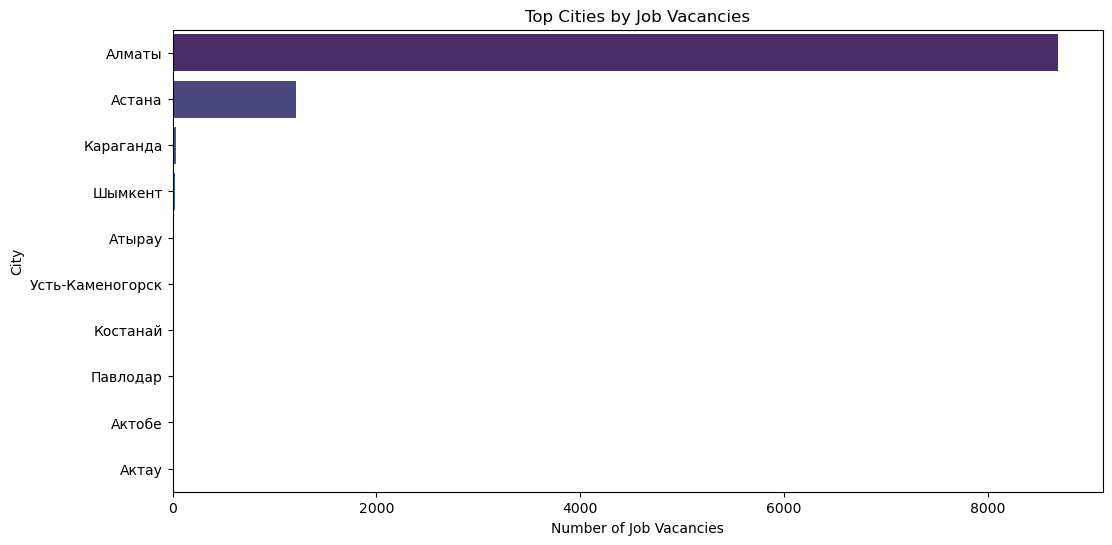

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Question: "Which cities have the highest number of job vacancies?"


jobs_count_column = 'Jobs Count'
city_column = 'City'

top_cities = df.groupby(city_column)[jobs_count_column].sum().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Top Cities by Job Vacancies')
plt.xlabel('Number of Job Vacancies')
plt.ylabel('City')
plt.show()


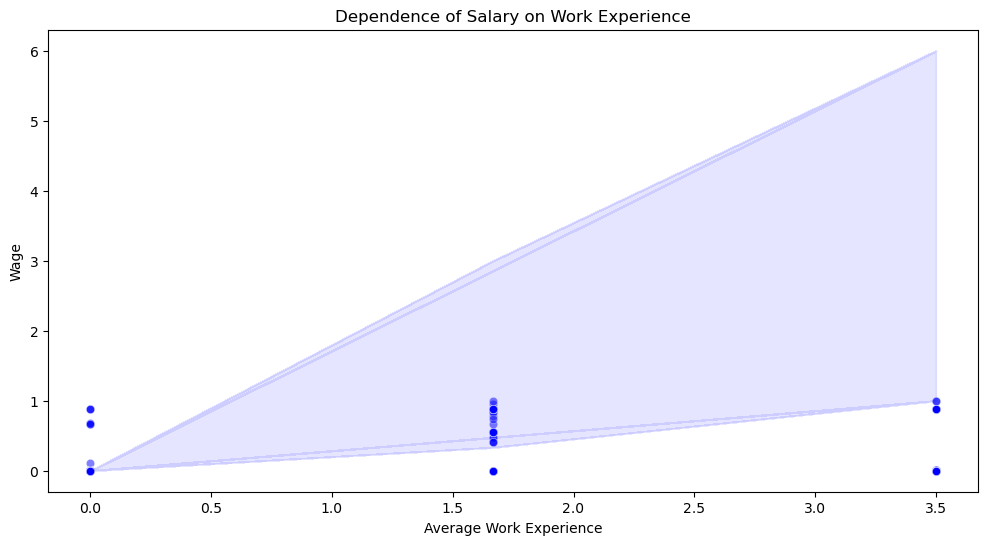

Correlation between average experience and salary: 0.00


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# "Влияние опыта на заработную плату: Как меняется уровень заработной платы в зависимости от опыта работы? Существует ли корреляция между опытом и размером заработной платы?"

# Translation:

# "Influence of Experience on Salary: How does the level of salary change depending on work experience? Is there a correlation between experience and salary size?"


min_experience_column = 'Min_Experience'
max_experience_column = 'Max_Experience'
salary_column = 'Salary'

df['Average_Experience'] = (df[min_experience_column] + df[max_experience_column]) / 2

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Average_Experience', y=salary_column, data=df, color='blue', alpha=0.5)
plt.fill_between(df['Average_Experience'], df[min_experience_column], df[max_experience_column], color='blue', alpha=0.1)

plt.title('Dependence of Salary on Work Experience')
plt.xlabel('Average Work Experience')
plt.ylabel('Wage')
plt.show()

# Calculate the correlation coefficient
correlation = df['Average_Experience'].corr(df[salary_column])
print(f'Correlation between average experience and salary: {correlation:.2f}')


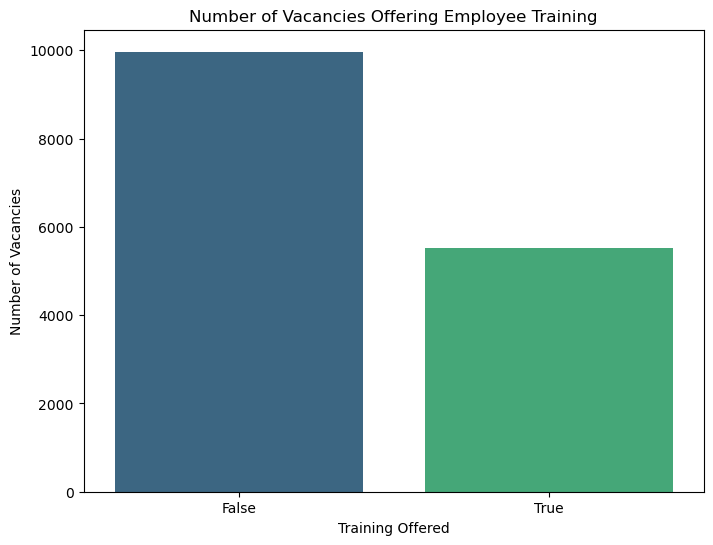

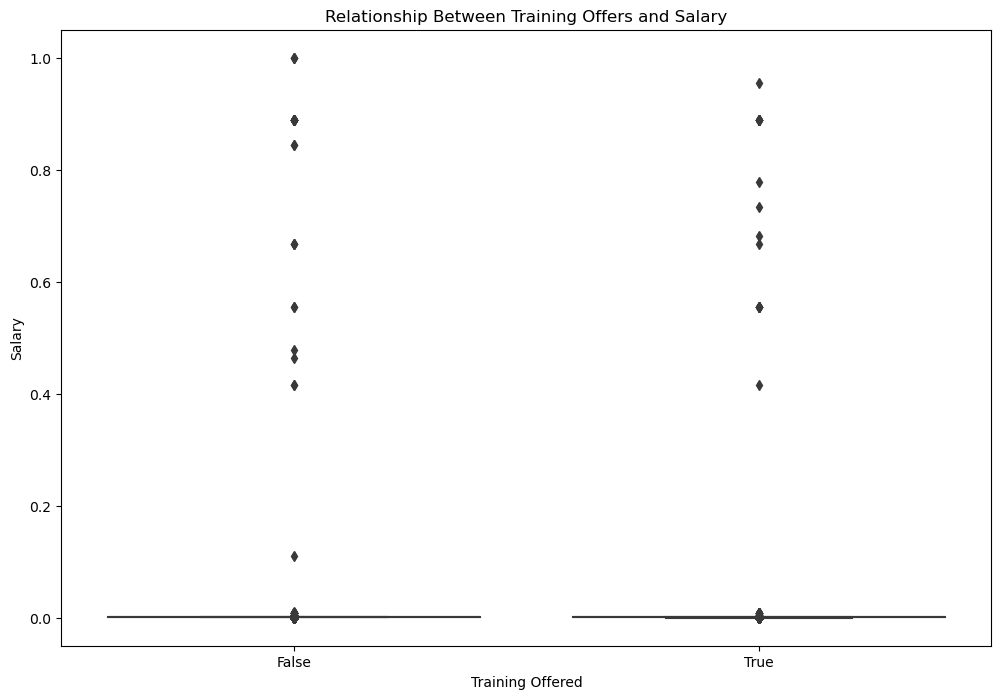

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Is there a connection between job offers with training and the salary level?"
description_column = 'Description'
salary_column = 'Salary'

training_keywords = ['обучение', 'подготовка', 'курсы', 'обучающий процесс']

df['Training_Offered'] = df[description_column].apply(lambda x: any(keyword in str(x).lower() for keyword in training_keywords))

training_counts = df['Training_Offered'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=training_counts.index, y=training_counts.values, palette='viridis')
plt.title('Number of Vacancies Offering Employee Training')
plt.xlabel('Training Offered')
plt.ylabel('Number of Vacancies')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Training_Offered', y=salary_column, data=df, palette='viridis')
plt.title('Relationship Between Training Offers and Salary')
plt.xlabel('Training Offered')
plt.ylabel('Salary')
plt.show()





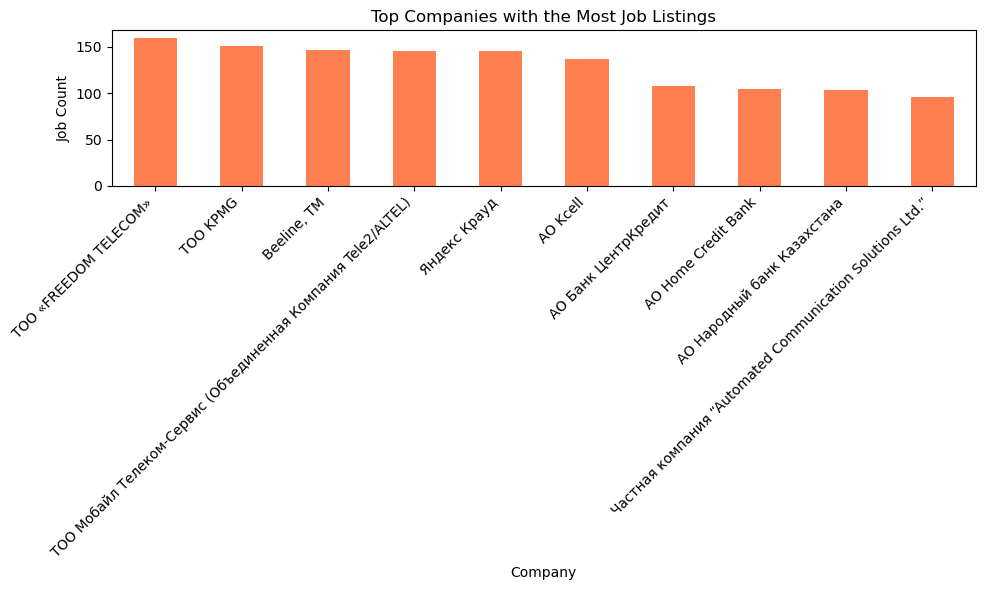

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Which companies have the most job listings in the dataset?
company_job_count = df['Company'].value_counts()

# Top N companies with the most job listings
top_n_companies = 10
top_companies = company_job_count.head(top_n_companies)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_companies.plot(kind='bar', color='coral')
plt.title('Top Companies with the Most Job Listings')
plt.xlabel('Company')
plt.ylabel('Job Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


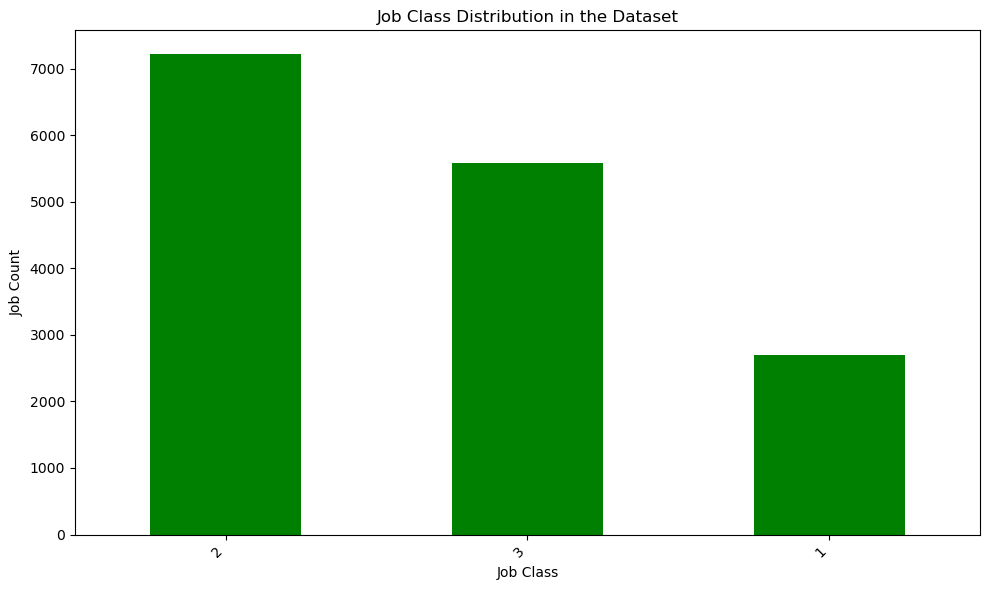

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# What is the distribution of job classes in the dataset?
job_class_distribution = df['Job_Class'].value_counts()

plt.figure(figsize=(10, 6))
job_class_distribution.plot(kind='bar', color='green')
plt.title('Job Class Distribution in the Dataset')
plt.xlabel('Job Class')
plt.ylabel('Job Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


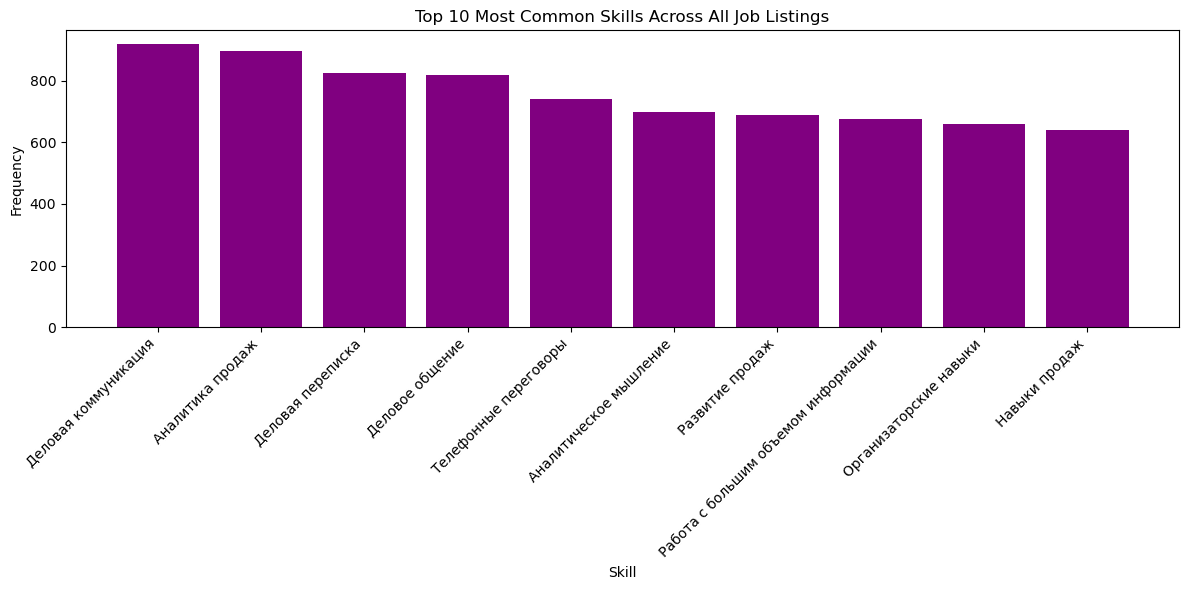

In [69]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# What are the most common skills required across all job listings?
all_skills_text = ' '.join(df['Skills'].dropna())

all_skills_list = all_skills_text.split(', ')

skills_counter = Counter(all_skills_list)

most_common_skills = skills_counter.most_common(10)

plt.figure(figsize=(12, 6))
plt.bar(*zip(*most_common_skills), color='purple')
plt.title('Top 10 Most Common Skills Across All Job Listings')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Correlation Coefficient: 0.10811263590283648


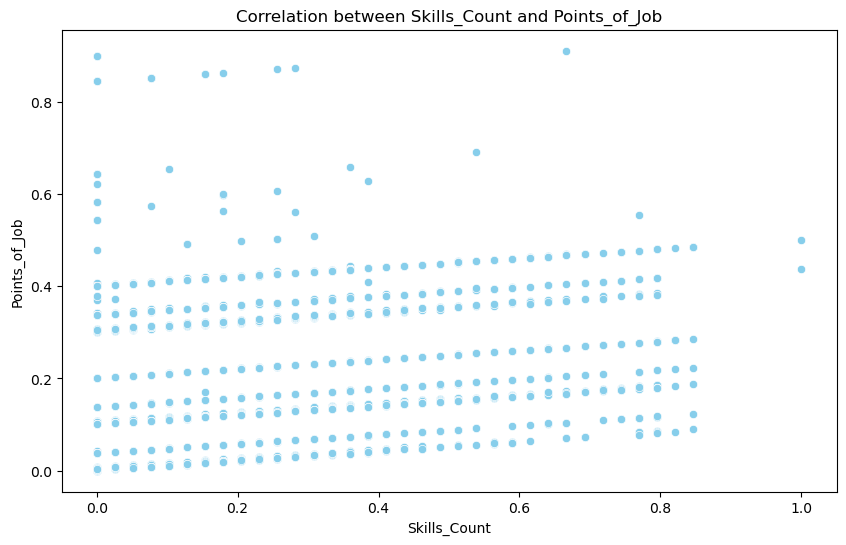

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
# Replace 'YourDataFrame' with the actual name if different

# Drop rows where either 'Skills_Count' or 'Points_of_Job' is NaN
df_subset = df[['Skills_Count', 'Points_of_Job']].dropna()

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Skills_Count', y='Points_of_Job', data=df_subset, color='skyblue')
plt.title('Correlation between Skills_Count and Points_of_Job')
plt.xlabel('Skills_Count')
plt.ylabel('Points_of_Job')

# Calculate and display the correlation coefficient
correlation_coefficient = df_subset['Skills_Count'].corr(df_subset['Points_of_Job'])
print(f'Correlation Coefficient: {correlation_coefficient}')

plt.show()


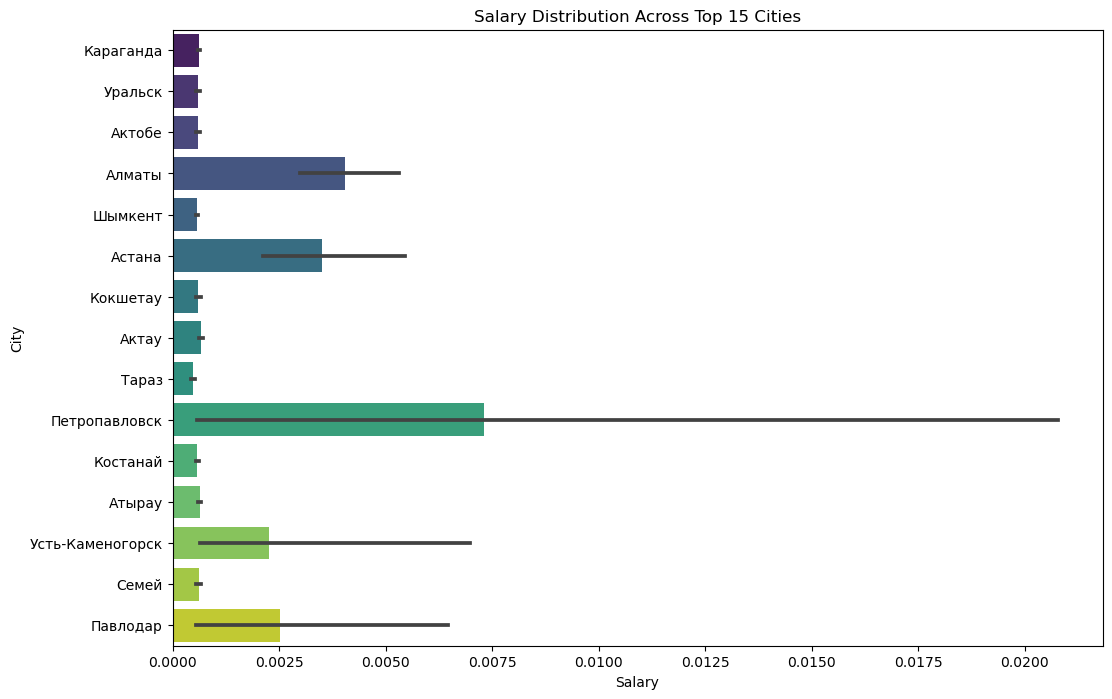

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# How is the salary distributed across different cities.    


top_cities = df.groupby('City')['Salary'].sum().sort_values(ascending=False).head(15).index

df_top_cities = df[df['City'].isin(top_cities)]

plt.figure(figsize=(12, 8))
sns.barplot(data=df_top_cities, y='City', x='Salary', palette='viridis')
plt.xlabel('Salary')
plt.ylabel('City')
plt.title('Salary Distribution Across Top 15 Cities')

plt.show()


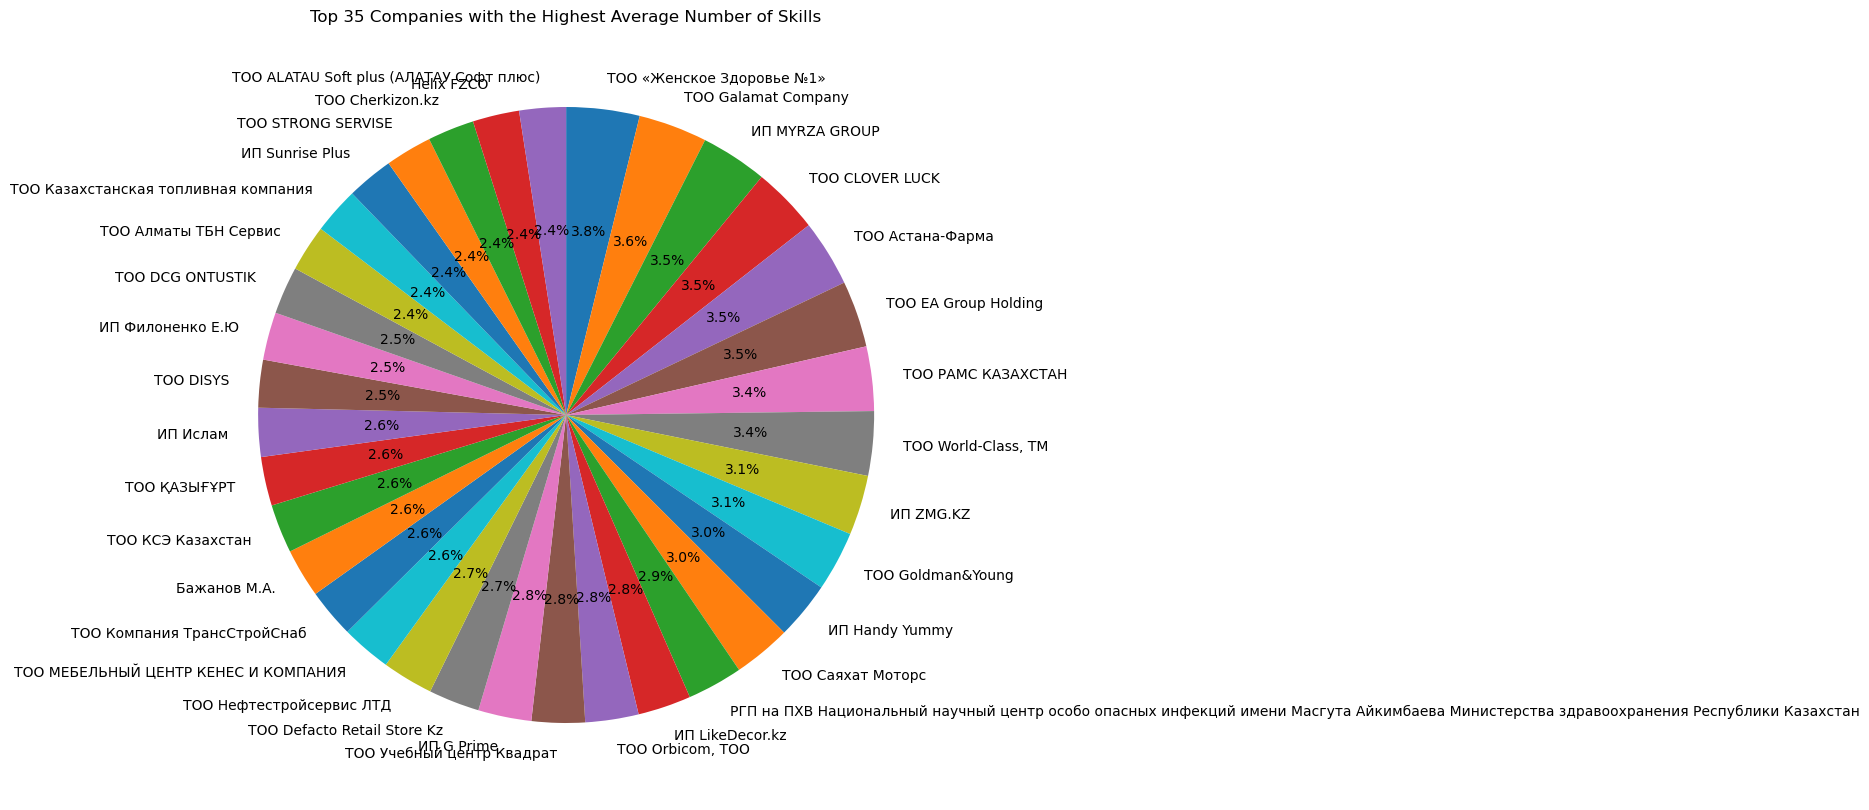

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average number of skills required by each company.
average_skills_per_company = df.groupby('Company')['Skills_Count'].mean().reset_index()

sorted_companies = average_skills_per_company.sort_values(by='Skills_Count', ascending=False)

top_35_companies = sorted_companies.head(35)

plt.figure(figsize=(10, 10))
plt.pie(top_35_companies['Skills_Count'], labels=top_35_companies['Company'], autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Top 35 Companies with the Highest Average Number of Skills')

plt.show()


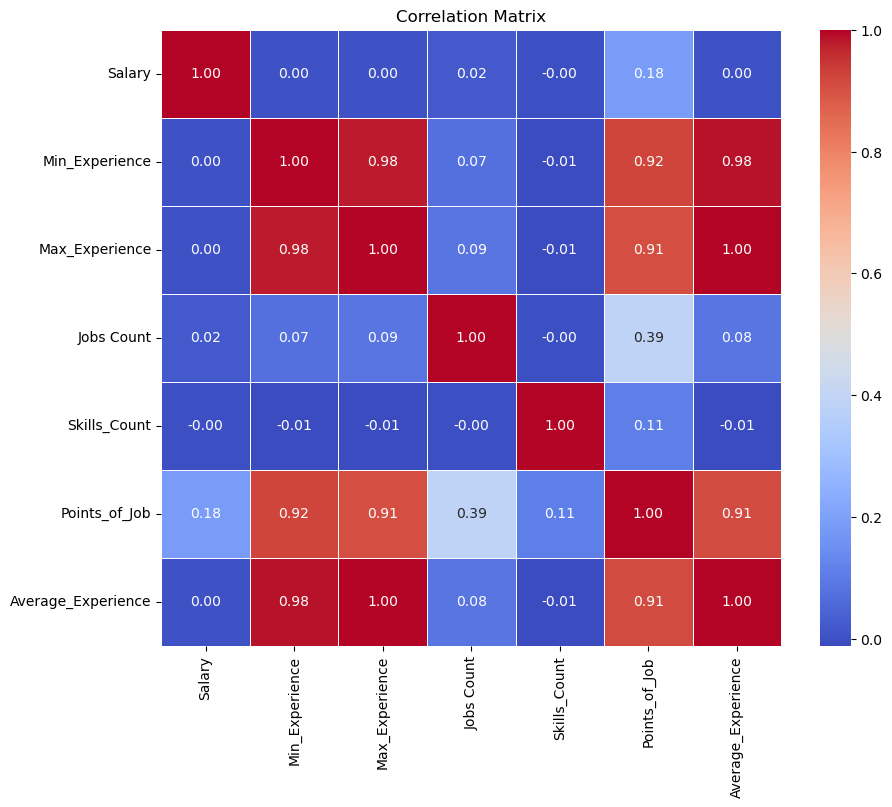

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation between the 'Average_Experience' and other numerical columns 
numerical_columns = ['Salary', 'Min_Experience', 'Max_Experience', 'Jobs Count', 'Skills_Count', 'Points_of_Job', 'Average_Experience']

correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
